## Aprendizagem de máquina


**Nome: Fernando Cheng Gong**

**RM: 93823**

**Turma: 2TDSA**

**Ano: 2023**


### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


Referências:

1. https://machinelearningmastery.com/overfitting-machine-learning-models/
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
4. https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/
5. https://chat.openai.com/chat/d8b12d37-1654-416f-a2f7-9cd2c5943a93
6. https://www.tibco.com/pt-br/reference-center/what-is-unsupervised-learning#:~:text=O%20aprendizado%20n%C3%A3o%20supervisionado%20possui,m%C3%A1quina%20pode%20medir%20sua%20precis%C3%A3o.
7. https://chat.openai.com/chat/f89b8cec-1f72-4496-b52a-2b7b82b1a887

# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

## 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
# leitura do dataframe
df = pd.read_csv('aptos.csv', encoding='UTF-8', sep=',')
df.head(1000)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,Centro
110,56,247.0,2,1,0.0,Planalto
111,126,736.0,3,3,0.0,Iraja
112,96,560.0,3,1,0.0,Centro


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   Metros: área do apartamento em m²;
-   Valor: preço para cada m²;
-   Quartos: quantidade de quartos;
-   Vagas: quantidade de vagas provavelmente da garagem;
-   Reformado: diz se o imóvel foi reformado ou não;
-   Bairro: localização do imóvel.

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  Pressupõe-se que um imóvel reformado custa mais do que um não reformado.
2.  O atributo "valor" está diretamente relacionado a "metros".



## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [ ]:
# primeiramente, vamos ver se há dados faltantes no dataframe
df.isnull().sum()

metros       0
valor        1
quartos      0
vagas        0
reformado    1
bairro       0
dtype: int64

São dois dados faltantes num total de 114, mas por preferência pessoal, preferi preencher esses dados ao invés de simplesmente apagar a row.

OBS: vi mais para frente do estudo que a quantidade de dados em cada bairro, em específico, é discrepante. Alguns tem muitos e outros tem poucos dados, justificando ainda mais essa decisão.

In [ ]:
# contando quantos imóveis foram reformados e quantos não foram
df['reformado'].value_counts()

1.0    58
0.0    55
Name: reformado, dtype: int64

São 58 reformados contra 56 não reformados, um dos NaN está no quesito reformado e como 55 é o menor, então deixarei como 0.

In [ ]:
# substituindo os NaN
df.loc[64, 'valor'] = round((120*525)/113) # essa conta veio de uma regra de três baseada em seus valores de vizinhos semelhantes
df.loc[91, 'reformado'] = 0

Antes de ir para o tratamento dos outliers, vamos ver se cada bairro tem uma quantidade razoável de dados para serem trabalhados.

In [ ]:
# contando cada bairro em específico
df['bairro'].value_counts()

Centro             35
Baeta Neves        17
Assuncao           10
Rudge Ramos         9
Vila Lusitania      6
Planalto            5
Demarchi            5
Ferrazopolis        4
Taboao              4
Santa Teresinha     4
Independencia       3
Nova Petropolis     3
Iraja               3
Pauliceia           2
Jardim do Mar       2
Jordanopolis        1
Piraporinha         1
Name: bairro, dtype: int64

Acima, vemos que temos vários bairros com poucas ocorrências no dataframe. Então, não faria sentido tratar outliers nesses que há poucos dados, pois o cálculo e a determinação se um dado é anormal seria impreciso. A ideia vai ser simplesmente fazer um boxplot de todos os atributos em todos os bairros juntos.

In [ ]:
# importando a biblioteca para fazer gráficos
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'vagas')

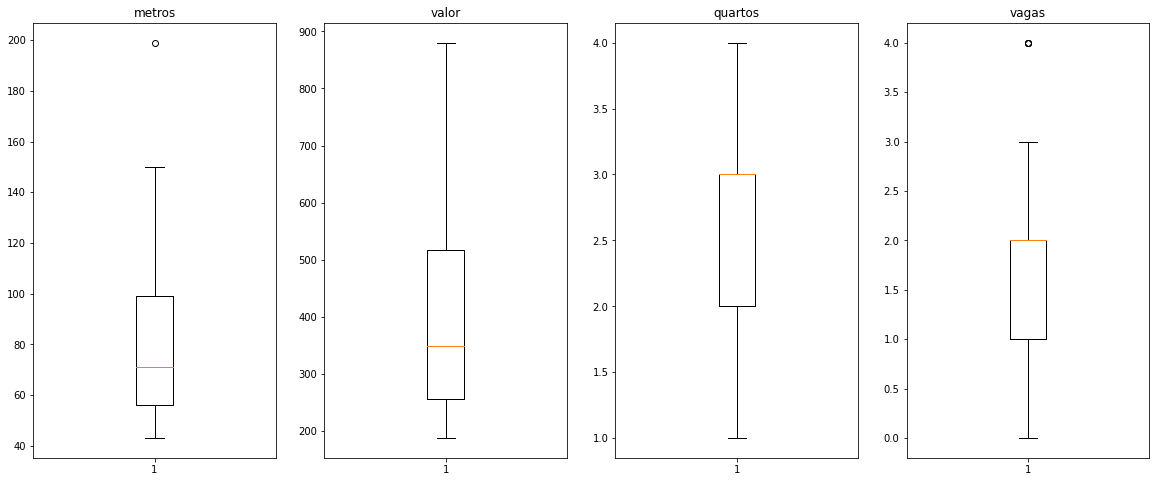

In [ ]:
fig, ([ax1, ax2, ax3, ax4]) = plt.subplots(1, 4, figsize=(20,8))

ax1.boxplot(df['metros'])
ax1.set_title('metros')

ax2.boxplot(df['valor'])
ax2.set_title('valor')

ax3.boxplot(df['quartos'])
ax3.set_title('quartos')

ax4.boxplot(df['vagas'])
ax4.set_title('vagas')

Acima, vemos que temos outliers tanto em "metros" quanto em "vagas". Entretanto, no atributo "vagas", a distância entre o outlier valendo 4 e o limite máximo é pouca o que não faz sentido tratar esse dado, diferente do atributo "metros", onde o limite máximo vale em torno de 150 e o outlier 200.

In [ ]:
# eliminando a linha onde metros vale 200
df = df.drop(38)

Nesse caso, faz mais sentido simplesmente eliminar a row do que tentar mudar o metros para um valor mais baixo, visto que, ao fazer isso, teríamos que mudar os demais atributos (quartos, vagas e valor), ferindo a integridade do dataset e possivelmente diminuindo a performance do modelo de machine learning.

Agora que encerramos o tratamento, vamos validar as afirmações levantadas anteriormente:

1.  Pressupõe-se que um imóvel reformado custa mais do que um não reformado.
2.  O atributo "valor" está diretamente relacionado a "metros".

A fim de validar a primeira afirmação, vamos ver a média do valor entre os imóveis reformados e os não reformados

In [ ]:
# média dos imóveis reformados
df[df['reformado']==1].mean()

<ipython-input-10-b30a8e692017>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['reformado']==1].mean()


metros        77.672414
valor        392.172414
quartos        2.482759
vagas          1.603448
reformado      1.000000
dtype: float64

In [ ]:
# média dos imóveis não reformados
df[df['reformado']==0].mean()

<ipython-input-11-695a6e20b35b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['reformado']==0].mean()


metros        79.254545
valor        405.563636
quartos        2.581818
vagas          1.709091
reformado      0.000000
dtype: float64

Observa-se que o atributo "reformado" deu uma média de 392, enquanto no "não reformado" deu 413. Assim, esses dados já refutam a ideia de um imóvel reformado valer mais que um imóvel não reformado.



---



Agora, a partir da segunda afirmação, vamos validar se o valor de um imóvel varia diretamente de acordo com a metragem.

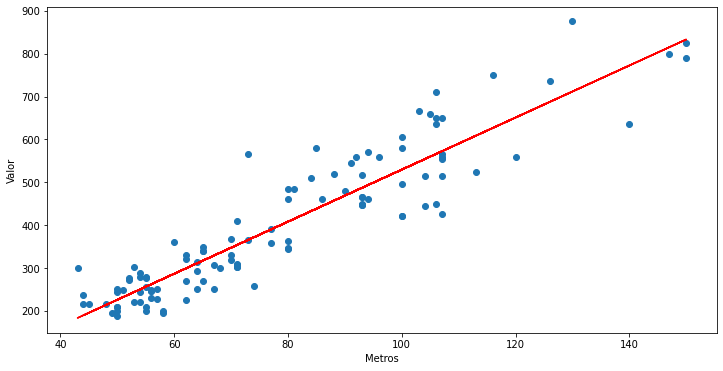

In [ ]:
# gráfico de dispersão
plt.figure(figsize=(12, 6))

# calcular os coeficientes da equação da linha de regressão linear
coef = np.polyfit(df['metros'], df['valor'], 1)
m = coef[0]  # Coeficiente angular
b = coef[1]  # Coeficiente linear

#y = mx + b --- equação para visualizar a linha vermelha

plt.scatter(df['metros'], df['valor'])
plt.plot(df['metros'], m*df['metros']+b, color='red')
plt.xlabel('Metros')
plt.ylabel('Valor')
plt.show()

In [ ]:
# calculando o coeficiente de correlação de Pearson
correlation = df['valor'].corr(df['metros'])
print('Coeficiente de correlação:', correlation) # quanto mais próximo de 1, mais correlação vai ter

Coeficiente de correlação: 0.92197664363254


A partir do gráfico de dispersão acima, vemos que os pontos azuis tendem a seguir uma trajetória linear (seguida pela linha vermelha). Isto é: há uma forte correlação entre "metros" e "valor", quanto maior a metragem, maior será o valor e vice-versa.

O coeficiente de correlação também afirma isso, dando um valor de 0.9 numa escala de 0 a 1.

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)?

**Resposta:** Sim, o dataframe tem outliers tanto no atributo "metros" quanto em "vagas". O método adotado foi analisando os gráficos gerados pelo boxplot. A linha onde "metros" valia 200 foi completamente eliminada do dataset, enquanto que os outliers localizados no atributo "vagas" foram mantidos, pois a distância entre o limite máximo (3) e os outliers (4) é pequena.

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado



O conjunto de dados indica o aprendizado supervisionado como o mais apropriado para determinar o valor de um imóvel nesse dataset. Isso se deve, porque queremos prever uma saída (nesse caso o valor) com base em entradas rotuladas (os demais atributos do dataset)

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Algoritmo: LassoRegression
2. Algoritmo: LinearRegressor

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. Algoritimo: O LassoRegression usa uma regularização chamada L1 para evitar certos vícios (overfitting) no modelo a fim de eliminar características irrelevantes, reduzindo a complexidade do modelo. É um ótimo modelo para encontrar relações diretas e lineares como o LinearRegression.
2. Algoritimo: o LinearRegression é um modelo que tenta encontrar uma relação linear entre as variáveis. Ele assume que a relação entre essas variáveis pode ser representada por uma equação linear. Esse modelo é mais simples, além de ser mais rápido de treinar e utilizar, ou seja, possui melhores resultados para quando a relação é linear e a interpretação é direta.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [ ]:
df_v1 = pd.get_dummies(df, columns=['bairro'])

OBS: tinha testado o OneHotEncoder, mas esse método tinha criado algumas linhas com dados faltantes no dataset, por esse motivo, decidi fazer com o get_dummies.
Havia considerado usar o OneLabelEncoder, porém fiquei receoso do algoritmo entender uma certa ordem de importância ou hierarquia entre os bairros.

In [ ]:
df_v1

,metros,valor,quartos,vagas,reformado,bairro_Assuncao,bairro_Baeta Neves,bairro_Centro,bairro_Demarchi,bairro_Ferrazopolis,...,bairro_Jardim do Mar,bairro_Jordanopolis,bairro_Nova Petropolis,bairro_Pauliceia,bairro_Piraporinha,bairro_Planalto,bairro_Rudge Ramos,bairro_Santa Teresinha,bairro_Taboao,bairro_Vila Lusitania
0,107,560.0,3,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,107,555.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,49,196.0,2,1,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,104,515.0,3,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,92,560.0,3,2,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,65,340.0,2,2,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
110,56,247.0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
111,126,736.0,3,3,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,96,560.0,3,1,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1: LassoRegression

In [ ]:
from sklearn.model_selection import train_test_split

A = df_v1.drop(columns=['valor'])
b = df_v1['valor']

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.1, random_state = 100)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(A_train, b_train)

Lasso()

In [ ]:
b_test_prediction = lasso.predict(A_test)
b_train_prediction = lasso.predict(A_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_lasso_test = mean_squared_error(b_test, b_test_prediction)
MSE_lasso_train = mean_squared_error(b_train, b_train_prediction)
R2_lasso_test = r2_score(y_true = b_test, y_pred = b_test_prediction)
R2_lasso_train = r2_score(y_true = b_train, y_pred = b_train_prediction)

print("LASSO REGRESSION")
print()
print("TESTE")
print('R2: ', R2_lasso_test)
print('MSE: ', MSE_lasso_test)
print()
print("TREINO")
print('R2: ', R2_lasso_train)  
print('MSE: ', MSE_lasso_train)

LASSO REGRESSION

TESTE
R2:  0.8968190306751423
MSE:  3083.462236907575

TREINO
R2:  0.8508247919606791
MSE:  4025.0895680544786


### Algoritmo 2: LinearRegressor

In [ ]:
from sklearn.model_selection import train_test_split

X = df_v1.drop(columns=['valor'])
y = df_v1['valor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)





In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_test_prediction = lr.predict(X_test)
y_train_prediction = lr.predict(X_train)

In [ ]:
MSE_lr_test = mean_squared_error(y_test, y_test_prediction)
MSE_lr_train = mean_squared_error(y_train, y_train_prediction)
R2_lr_test = r2_score(y_true = y_test, y_pred = y_test_prediction)
R2_lr_train = r2_score(y_true = y_train, y_pred = y_train_prediction)

print("LINEAR REGRESSOR")
print()
print("TESTE")
print('R2: ', R2_lr_test)
print('MSE: ', MSE_lr_test)
print()
print("TREINO")
print('R2: ', R2_lr_train)
print('MSE: ', MSE_lr_train)

LINEAR REGRESSOR

TESTE
R2:  0.8742864549993359
MSE:  3756.8261978320347

TREINO
R2:  0.8615990138422361
MSE:  3734.376327769079


**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** Ambos os algoritmos conseguiram valores quase semelhantes no quesito R2, pois os dois são bons em identificar relações diretas e lineares. Pessoalmente, usaria o LassoRegression, visto que evita overfittings. (O MSE foi usado como um outro parâmetro para ver se o algoritmo está viciado)

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

Métrica usada: R²

|    | LassoRegression | LinearRegression |
|:---:|:---:|:---:|
| teste | 89.6% | 87.4% |
| treino  | 85% | 86.1% |

Métrica usada: MSE

|    | LassoRegression | LinearRegression |
|:---:|:---:|:---:|
| teste | 3083.4 | 3756.8 |
| treino  | 4025 | 3734.3 |

Os valores de treino e teste não são distantes tanto na métrica R² quanto na MSE, deixando baixa a hipótese de que algum modelo está com overfitting.

## 5. Modelo de produção: teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [ ]:
# cria um objeto Index
idx = df_v1.drop(columns=['valor']).columns

# cria um dicionário com valores iguais a 0
dict_idx = dict((key, 0) for key in idx)

dict_idx['metros'] = 72
dict_idx['quartos'] = 2
dict_idx['vagas'] = 2
dict_idx['reformado'] = 1
dict_idx['bairro_Centro'] = 1

In [ ]:
novo_apartamento = pd.DataFrame(dict_idx, index=[0])

In [ ]:
valor_previsto_lasso = lasso.predict(novo_apartamento)
print(f"Preço do apartamento com LassoRegression: {valor_previsto_lasso[0]}")

valor_previsto_lr = lr.predict(novo_apartamento)
print(f"Preço do apartamento com LinearRegression: {valor_previsto_lr[0]}")

Preço do apartamento com LassoRegression: 360.4755292761064
Preço do apartamento com LinearRegression: 364.8279677342313


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim, ambos os modelos obtiveram resultados satisfatórios acima de 80% e menores que 90%. A justificativa foi a escolha do modelo de machine learning, visto que, antes de escolher um algoritmo, analisamos, por meio de gráficos, a relação entre os dados e percebi que tinham uma certa linearidade.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Além de reunir um dataset com uma maior quantidade de dados (para um melhor manuseio, tratamento e treino do modelo), talvez algumas técnicas de pré-processamento ou algo do tipo que foge do meu conhecimento atual.




